# Graph Magnitude Homology Ranks Calculations

- Original maple code by Simon Willerton
- Translation into Python+SAGE by James Cranch
- Further modifications by Simon Willerton
- Modified for SageMath 9 by Simon Willerton Nov 2022


The program just generates the chain groups and calculates the differentials
then uses the ChainComplex package to calculate the homology.

For a graph g the chain groups `MC_{*,*}(g)` break up in to subcomplexes
`MC_{*,l}^{s,t}(g)` where `l` is the length of the chain and `s` and `t` are the initial
and terminal vertices of the chain.

So here `generators[s,t,k,l]` is a list of the degree `k` generators of such a chain group.
Then `differential[s,t,k,l]` is a matrix giving the differential from `generators[s,t,k,l]`
to `generators[s,t,k-1,l]`.

The homology of each subcomplex is calculated then the ranks are added together to give
the required output.


First pick a base ring to work over.  

In [16]:
#BaseRing = IntegerRing()
BaseRing = RationalField()
#BaseRing = FiniteField(2)

Define all of the functions.

In [17]:
def magnitude_homology(g, lmax=6):
    kmax = lmax + 1
    d = g.distance_all_pairs()
    vertices = g.vertices(sort=True)
    
    # populate the generators recursively
    generators = dict(((s, t, k, l),[]) for s in vertices for t in vertices
                                     for k in range(kmax + 2) for l in range(lmax + 1))

    
    def add_generators(a, l, x):
        k = len(a) - 1
        if k <= kmax and l <= lmax:
            generators[(a[0], a[len(a) - 1], k, l)].append(a)
            for y in vertices:
                if x != y:
                    add_generators(a + [y], l + d[x][y], y)
    
    
    for x in vertices:
        add_generators([x], 0, x)

    # number the generators, so as to produce differentials rapidly
    for s in vertices:
        for t in vertices:
            for l in range(lmax + 1):
                for k in range(kmax + 1):
                    generators[(s, t, k, l)] = dict((tuple(a), i)
                                                    for (i, a) in enumerate(generators[(s, t, k, l)]))


    def differential(s, t, k, l):
        m = {}
        h = generators[(s, t, k-1, l)]
        for (a, i) in generators[(s, t, k, l)].items():
            for z in range(len(a) - 2):
                if d[a[z]][a[z + 1]] + d[a[z + 1]][a[z + 2]] == d[a[z]][a[z + 2]]:
                    j = h[a[:z + 1]+a[z + 2:]]
                    if z % 2:
                        m[(j, i)] = m.get((j, i), 0) + 1
                    else:
                        m[(j, i)] = m.get((j, i), 0) - 1
        return matrix(BaseRing, len(h), len(generators[(s, t, k, l)]), m)


    def chains(s, t, l):
        differentials = dict((k, differential(s, t, k, l)) for k in range(1, kmax + 1)
                             if generators[(s, t, k, l)] or generators[(s, t, k-1, l)])
        return ChainComplex(differentials, base_ring=BaseRing, degree=-1)


    def homology(s, t, l):
        return chains(s, t, l).homology(generators=False)

    
    return dict(((s, t, l), homology(s, t, l)) for s in vertices for t in vertices
                                               for l in range(lmax+1))

Choose the graph you want to do the calculation for.

Pick from the list below or create your own.

Define `g` to be the graph and `graph_name` to be its name.

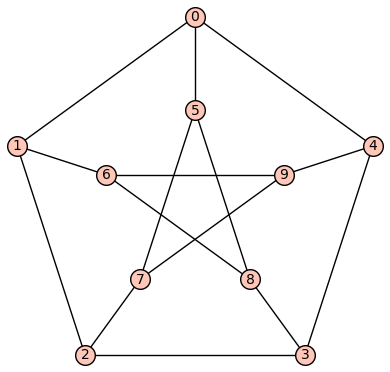

In [24]:
def figure_eight(m, n):
    g1 = graphs.CycleGraph(m)
    g2 = graphs.CycleGraph(n + m - 2)
    return g1.union(g2)

def cyclic_wedge(m, n):
    g1 = graphs.CycleGraph(m)
    g2 = graphs.CycleGraph(n)
    g2.relabel(lambda i: i + m - 1)
    return g1.union(g2)

#g = Graph([(1, 2), (2, 3), (3, 4), (4, 1), (3, 1)])
#g = graphs.CycleGraph(9); graph_name = "Cyc(9)"
#g = figure_eight(5, 4); graph_name = 'Cyc(5) union Cyc(4) over an edge'
#g = cyclic_wedge(4, 5)
#g = graphs.CompleteBipartiteGraph(4, 3); graph_name='C(4, 3)'
#g = graphs.RandomGNP(5, 0.7)
#g = graphs.DodecahedralGraph(); graph_name = 'Dodecahedral Graph'
#g = graphs.HexahedralGraph(); graph_name = 'Hexecahedral Graph'
#g = graphs.OctahedralGraph(); graph_name = 'Octahedral Graph'
#g = graphs.IcosahedralGraph(); graph_name = 'Icosahedral Graph'
#g = graphs.MoebiusKantorGraph(); graph_name = 'Moebius Kantor Graph'
#g = graphs.PappusGraph(); graph_name = 'Pappus Graph'
#g = graphs.HeawoodGraph(); graph_name = 'Heawood Graph'
g = graphs.PetersenGraph(); graph_name='Petersen Graph'
#g = Graph({0: [1, 2, 3, 4, 5], 1: [0, 2, 3, 4, 5], 2: [0, 1, 3, 4, 5], 3: [0, 1, 2], 4:[0, 1, 2], 5: [0, 1, 2]})
#g = Graph({0: [1, 5], 1: [0, 2, 4, 5], 2: [1, 3, 4], 3: [2, 4], 4: [1, 2, 3, 5], 5: [1, 4, 0]}); graph_name = '{0:[1,5],1:[0,2,4,5],2:[1,3,4],3:[2,4],4:[1,2,3,5],5:[1,4,0]'
#g = Graph({0: [1, 4, 5], 1: [0, 2, 4], 2: [1, 3, 4], 3: [2, 4], 4: [0, 1, 2, 3, 5], 5: [4, 0]}); graph_name = '0:[1,4,5],1:[0,2,4],2:[1,3,4],3:[2,4],4:[0,1,2,3,5],5:[4,0]'
#g = graphs.CompleteMultipartiteGraph([3, 3, 3, 3, 3]); graph_name = "C(3, 3, 3, 3, 3)"
#h = graphs.CycleGraph(5)
#h = graphs.PetersenGraph()
#k = graphs.CycleGraph(5)
#k = graphs.CompleteMultipartiteGraph([1])
#g = h.join(k); graph_name = "Cyc(5) + Cyc(5)"
#g = graphs.TutteCoxeterGraph(); graph_name = "Tutte Coxeter Graph"

g.show()

Set the maximum length of chains.

In [25]:
lmax = 6

Do the calculation.

In [26]:
print(graph_name)
print('lmax = {0}'.format(lmax))

homology = magnitude_homology(g, lmax)

total_rank = dict(((k, l), 0) for k in range(0, lmax + 1) for l in range(0, lmax + 1))

vertices = g.vertices(sort=True)

for s in vertices:
    for t in vertices:
        for l in range(lmax + 1):
            for degree, group in sorted(homology[s, t, l].items()):
                total_rank[degree, l] += group.rank()

for l in range(0, lmax + 1):
    print ('\n\r{0:2d}:'.format(l), end="")
    for k in range(0, lmax + 1):
        if total_rank[k, l] != 0:
            print ('{0:5d} '.format(total_rank[k, l]), end="")
        else:
            print ('      ', end="")

Petersen Graph
lmax = 6

 0:   10                                     
 1:         30                               
 2:               30                         
 3:              120    30                   
 4:                    480    30             
 5:                          840    30       
 6:                         1440  1200    30 